<a href="https://colab.research.google.com/github/CA683-Group99/Wind-Energy-Prediction/blob/branch2/IrelandElectricityData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import io
import requests


from plotly.offline import iplot
import plotly.graph_objs as go
from plotly import tools
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

from datetime import tzinfo, timedelta, datetime, date

# Any results you write to the current directory are saved as output.

import plotly.express as px
import seaborn as sns

## General settings

In [2]:
usePreloadedData = False # True to load pre-prepared dataset , False to load directly from eirgrid data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
os.chdir('/content/drive/MyDrive/CA683Project')


# Eirgrid Wind generation
http://smartgriddashboard.eirgrid.com/#all

In [5]:
if usePreloadedData == False:
  # Wind energy Actual and Prediction
  
  sample_url = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ROI&datefrom=01-Jan-2018%2000:00&dateto=31-Jan-2018%2023:59'

  url_base = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ROI&datefrom=01-'
  url_mid = '%2000:00&dateto='
  url_end = '%2023:59'

  years = ['2020']
  months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
  endDay= [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
  tempds = []
  months_years = []

  for year in years:
    i = 0
    for month in months:
      url = url_base + month + '-' + year + url_mid + str(endDay[i]) + '-' + month + '-' + year + url_end
      i = i+1
      print(url)
      s = requests.get(url).content

      mds = pd.read_csv(io.StringIO(s.decode('utf-8')), na_values='-')
      mds['date'] = pd.to_datetime(mds["DATE & TIME"], infer_datetime_format=True, errors='ignore')
      DT = pd.to_datetime(mds["DATE & TIME"], infer_datetime_format=True, errors='ignore').dt
      mds['Year'] = DT.year
      mds['Month'] = DT.strftime('%b')
      mds['DayTime'] = DT.strftime('%d, %R')
      tempds.append(mds)
      months_years.append(month + '-' + year)
      #url = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ROI&datefrom=01-Dec-2020%2000:00&dateto=31-Dec-2020%2023:59'


  wgds = pd.concat(tempds, keys=months_years)
  
  wgds = wgds.reset_index()
  wgds = wgds.drop('level_0', axis=1)
  wgds = wgds.drop('level_1', axis=1)
  wgds = wgds.drop('DATE & TIME', axis=1)


http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ROI&datefrom=01-Jan-2020%2000:00&dateto=31-Jan-2020%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ROI&datefrom=01-Feb-2020%2000:00&dateto=28-Feb-2020%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ROI&datefrom=01-Mar-2020%2000:00&dateto=31-Mar-2020%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ROI&datefrom=01-Apr-2020%2000:00&dateto=30-Apr-2020%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ROI&datefrom=01-May-2020%2000:00&dateto=31-May-2020%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ROI&datefrom=01-Jun-2020%2000:00&dateto=30-Jun-2020%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ROI&datefrom=01-Jul-2020%2000:00&datet

# Eirgrid Actual System Generation

In [7]:
if usePreloadedData == False:
  # Wind energy Actual and Prediction
  sample_url = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&region=ROI&datefrom=23-Jan-2021%2000:00&dateto=21-Feb-2021%2001:15'

  url_base = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&region=ROI&datefrom=01-'

  tempds = []
  months_years = []

  for year in years:
    i = 0
    for month in months:
      url = url_base + month + '-' + year + url_mid + str(endDay[i]) + '-' + month + '-' + year + url_end
      i = i+1
      print(url)
      s = requests.get(url).content

      mds = pd.read_csv(io.StringIO(s.decode('utf-8')), na_values='-')
      mds['date'] = pd.to_datetime(mds["DATE & TIME"], infer_datetime_format=True, errors='ignore')
      DT = pd.to_datetime(mds["DATE & TIME"], infer_datetime_format=True, errors='ignore').dt
      mds['Year'] = DT.year
      mds['Month'] = DT.strftime('%b')
      mds['DayTime'] = DT.strftime('%d, %R')
      tempds.append(mds)
      months_years.append(month + '-' + year)
      #url = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ROI&datefrom=01-Dec-2020%2000:00&dateto=31-Dec-2020%2023:59'


  sgds = pd.concat(tempds, keys=months_years)
  
  sgds = sgds.reset_index()
  sgds = sgds.drop('level_0', axis=1)
  sgds = sgds.drop('level_1', axis=1)
  sgds = sgds.drop('DATE & TIME', axis=1)

http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&region=ROI&datefrom=01-Jan-2020%2000:00&dateto=31-Jan-2020%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&region=ROI&datefrom=01-Feb-2020%2000:00&dateto=28-Feb-2020%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&region=ROI&datefrom=01-Mar-2020%2000:00&dateto=31-Mar-2020%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&region=ROI&datefrom=01-Apr-2020%2000:00&dateto=30-Apr-2020%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&region=ROI&datefrom=01-May-2020%2000:00&dateto=31-May-2020%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&region=ROI&datefrom=01-Jun-2020%2000:00&dateto=30-Jun-2020%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&reg

# System Demand: Actual and Prediction

### Data description
* **System Demand** - represents the predicted electricity production required to meet national consumption.
* **Sdate** - 
* **SREGION** - 
* **SActualDemandMW** - 
* **SFORECAST DEMAND(MW)** - 
* **SFORECAST WIND(MW)** - 
* **SActualWindMW** - 
* **Shour** - 
* **Sisweekday** - 
* **Smonth** - 
  
Actual and forecast System Demand are shown in **15 minute intervals.**

The data came from EirGrid Group about all island power systems and has been prepared by us for further analysis.

Source: https://smartgriddashboard.eirgrid.com/#all/demand

In [8]:
if usePreloadedData == False:
  # Demand Actual and Prediction
  sample_url = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ROI&datefrom=18-Jan-2021%2000:00&dateto=16-Feb-2021%2023:59'
  url_base = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ROI&datefrom=01-'

  i = 0
  tempds = []

  for year in years:
    i = 0
    for month in months:
      url = url_base + month + '-' + year + url_mid + str(endDay[i]) + '-' + month + '-' + year + url_end
      i = i+1
      print(url)
      s = requests.get(url).content

      mds = pd.read_csv(io.StringIO(s.decode('utf-8')), na_values='-')
      mds['date'] = pd.to_datetime(mds["DATE & TIME"], infer_datetime_format=True, errors='ignore')
      DT = pd.to_datetime(mds["DATE & TIME"], infer_datetime_format=True, errors='ignore').dt
      mds['Year'] = DT.year
      mds['Month'] = DT.strftime('%b')
      mds['DayTime'] = DT.strftime('%d, %R')
      tempds.append(mds)

  sdds = pd.concat(tempds, keys=months_years)
  sdds = sdds.reset_index()
  sdds = sdds.drop('level_0', axis=1)
  sdds = sdds.drop('level_1', axis=1)
  sdds = sdds.drop('DATE & TIME', axis=1)


http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ROI&datefrom=01-Jan-2020%2000:00&dateto=31-Jan-2020%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ROI&datefrom=01-Feb-2020%2000:00&dateto=28-Feb-2020%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ROI&datefrom=01-Mar-2020%2000:00&dateto=31-Mar-2020%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ROI&datefrom=01-Apr-2020%2000:00&dateto=30-Apr-2020%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ROI&datefrom=01-May-2020%2000:00&dateto=31-May-2020%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ROI&datefrom=01-Jun-2020%2000:00&dateto=30-Jun-2020%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ROI&datefrom=01-Jul-2020

In [9]:
sdds

ACTUAL DEMAND(MW)   FORECAST DEMAND(MW)   REGION  ...  Year  Month    DayTime
0                  3037.0                   NaN  Ireland  ...  2020    Jan  01, 00:00
1                  3021.0                   NaN  Ireland  ...  2020    Jan  01, 00:15
2                  2973.0                   NaN  Ireland  ...  2020    Jan  01, 00:30
3                  2931.0                   NaN  Ireland  ...  2020    Jan  01, 00:45
4                  2895.0                   NaN  Ireland  ...  2020    Jan  01, 01:00
...                   ...                   ...      ...  ...   ...    ...        ...
35035              3388.0                   NaN  Ireland  ...  2020    Dec  31, 22:45
35036              3408.0                   NaN  Ireland  ...  2020    Dec  31, 23:00
35037              3465.0                   NaN  Ireland  ...  2020    Dec  31, 23:15
35038              3439.0                   NaN  Ireland  ...  2020    Dec  31, 23:30
35039              3401.0                   NaN  Ireland  ...  2020    Dec  31, 23:45

[35040 rows x 7 columns]

# Merge CSV to have all data based on Date and Region: Ireland

In [10]:
if usePreloadedData == False:
  left = sdds.set_index(['date', 'Year', 'Month', 'DayTime', ' REGION'])
  middle = wgds.set_index(['date', 'Year', 'Month', 'DayTime', ' REGION'])
  right = sgds.set_index(['date', 'Year', 'Month', 'DayTime', ' REGION'])
  #right.index = right.index.tz_convert(None)

  newdf = left.join(middle)
  newdf = newdf.join(right)
  newdf = newdf.reset_index()
  newdf["hour"] = 0
  newdf["isweekday"] = False
  newdf["month"] = 0

  def settimeatt(row):
      row["hour"] = row.date.hour
      row["isweekday"] = (row.date.isoweekday() < 6) 
      row["month"] = row.date.month
      return row
  newdf = newdf.apply(settimeatt, axis='columns')

  newdf = newdf.rename(columns={' ACTUAL DEMAND(MW)' : 'ActualDemandMW'})
  newdf = newdf.rename(columns={'  ACTUAL WIND(MW)' : 'ActualWindMW'})

  newdf = newdf.rename(columns={' FORECAST WIND(MW)' : 'ForecastWndMW'})
  newdf = newdf.rename(columns={' ACTUAL GENERATION(MW)' : 'ActualGenerationMW'})



  newdf.to_csv("IrelandElectricity2020.csv") 
else:
  fileP = 'IrelandElectricity2020.csv'
  newdf = pd.read_csv(fileP)
  
newdf.head()

date  Year Month  ... hour isweekday  month
0 2020-01-01 00:00:00  2020   Jan  ...    0      True      1
1 2020-01-01 00:15:00  2020   Jan  ...    0      True      1
2 2020-01-01 00:30:00  2020   Jan  ...    0      True      1
3 2020-01-01 00:45:00  2020   Jan  ...    0      True      1
4 2020-01-01 01:00:00  2020   Jan  ...    1      True      1

[5 rows x 13 columns]

In [11]:
newdf.columns

Index(['date', 'Year', 'Month', 'DayTime', ' REGION', 'ActualDemandMW',
       ' FORECAST DEMAND(MW)', 'ForecastWndMW', 'ActualWindMW',
       'ActualGenerationMW', 'hour', 'isweekday', 'month'],
      dtype='object')

In [12]:
newdf.describe()

Year  ActualDemandMW  ...          hour         month
count  35044.0    35039.000000  ...  35044.000000  35044.000000
mean    2020.0     3337.528925  ...     11.498802      6.526424
std        0.0      637.959664  ...      6.922799      3.447903
min     2020.0     2004.000000  ...      0.000000      1.000000
25%     2020.0     2816.000000  ...      5.000000      4.000000
50%     2020.0     3348.000000  ...     11.000000      7.000000
75%     2020.0     3804.000000  ...     17.000000     10.000000
max     2020.0     5357.000000  ...     23.000000     12.000000

[8 rows x 8 columns]

In [13]:
#Krystian: Checking how many months do we have in our dataset (if the year is complete)
newdf.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [14]:
#Krystian: Looking for maximal extreme values
print('-----------DATA SIZE -------------')
print(newdf.shape)           # 10 Columns, 35044 rows
count_row = newdf.shape[0]   # 10 Columns
count_col = newdf.shape[1]   # 35044 rows
print('Rows: ', count_row, ', Columns: ', count_col)

print('-----------DATA INFO -------------')
print(newdf.info())

print('-----------DATA MAX Values -------------')
newdf.max()

print('-----------DATA COLUMNS-------------')
columns = newdf.columns.values.tolist()
print (columns)

print('-----------BASIC STATISTICS-------------')
newdf.tail()

-----------DATA SIZE -------------
(35044, 13)
Rows:  35044 , Columns:  13
-----------DATA INFO -------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35044 entries, 0 to 35043
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  35044 non-null  datetime64[ns]
 1   Year                  35044 non-null  int64         
 2   Month                 35044 non-null  object        
 3   DayTime               35044 non-null  object        
 4    REGION               35044 non-null  object        
 5   ActualDemandMW        35039 non-null  float64       
 6    FORECAST DEMAND(MW)  0 non-null      float64       
 7   ForecastWndMW         35040 non-null  float64       
 8   ActualWindMW          35039 non-null  float64       
 9   ActualGenerationMW    35039 non-null  float64       
 10  hour                  35044 non-null  int64         
 11  isweekday             

date  Year Month  ... hour isweekday  month
35039 2020-12-31 22:45:00  2020   Dec  ...   22      True     12
35040 2020-12-31 23:00:00  2020   Dec  ...   23      True     12
35041 2020-12-31 23:15:00  2020   Dec  ...   23      True     12
35042 2020-12-31 23:30:00  2020   Dec  ...   23      True     12
35043 2020-12-31 23:45:00  2020   Dec  ...   23      True     12

[5 rows x 13 columns]

# Visualisations

In [15]:
import plotly.express as px

fig = px.scatter(newdf, x='date', y='ActualDemandMW')
fig.show()

In [16]:
# import plotly.express as px
# Krystian: Checking hourly utilisation of the energy in each month
# Visible outliers

fig2 = px.scatter(newdf, x='hour', y='ActualDemandMW', color='month')
fig2.show()

In [17]:
# Krystian: 
# ' REGION', 'ActualDemandMW', ' FORECAST DEMAND(MW)', ' FORECAST WIND(MW)', 'ActualWindMW', 'hour', 'isweekday', 'month']

# year = pd.DatetimeIndex(newdf['date']).year.unique()
# month = pd.DatetimeIndex(newdf['date']).month.unique()
# pd.DatetimeIndex(newdf['date']).day.unique()

# fig4 = px.box(newdf, x='month', y="ActualDemandMW") #points='all')
fig4 = px.box(newdf, x='month', y="ActualDemandMW", color="isweekday",
             notched=True,
             title="Actual Demand measured in MW each month by type of the day",
             hover_data=["ActualDemandMW"]
            )
fig4.show()

# Electricity Generation by fuel type summary from SEAI

Data from https://www.seai.ie/data-and-insights/seai-statistics/monthly-energy-data/electricity/

In [18]:
#/content/drive/MyDrive/CA683Project/seai_Electricity_Monthly_Timeseries.csv
  
filename = 'seai_Electricity_Monthly_Timeseries.csv'
eGen = pd.read_csv(filename, header=0)

eGen

Electricity Generation (GWh) Label  ...  Nov-20  Dec-20
0                                                NaN   NaN  ...     NaN     NaN
1                                 Thermal Generation     A  ...  1478.5  1520.1
2                                               Coal     B  ...    90.0   105.7
3                                               Peat     C  ...   180.5   106.5
4                                                Oil     D  ...    14.5    17.6
5                                        Natural Gas     E  ...  1137.1  1232.8
6                             Combustible Renewables     F  ...    14.3    16.6
7                                             Wastes     G  ...    40.9    39.2
8                                    Other (CHP etc)     H  ...     1.1     1.6
9               Non-Combustible Renewable Generation     I  ...  1196.1  1384.0
10                                             Hydro     J  ...   136.2   135.6
11                                              Wind     K  ...  1059.9  1248.4
12                                             Solar     L  ...     0.0     0.0
13                             Indigenous Generation     M  ...  2674.6  2904.1
14                                       Net imports     N  ...   -35.4   -35.6
15                                           Imports     O  ...   150.7   144.3
16                                           Exports     P  ...  -186.1  -180.0
17                                  Total Generation     Q  ...  2639.2  2868.5
18                              Pumped Hydro Storage     R  ...   -12.6   -22.7
19                                           Pumping     S  ...   -29.0   -44.9
20                                         Generated     T  ...    16.4    22.3
21  Total Generated Less Pumped Hydro Storage Losses     U  ...  2626.6  2845.8

[22 rows x 135 columns]

In [19]:
eGen = eGen.transpose()

In [20]:
eGen.index

Index(['Electricity Generation (GWh)', 'Label', 'Notes', 'Jan-10', 'Feb-10',
       'Mar-10', 'Apr-10', 'May-10', 'Jun-10', 'Jul-10',
       ...
       'Mar-20', 'Apr-20', 'May-20', 'Jun-20', 'Jul-20', 'Aug-20', 'Sep-20',
       'Oct-20', 'Nov-20', 'Dec-20'],
      dtype='object', length=135)

In [21]:
eGen = eGen.drop(columns=0)

In [22]:
eGen.columns = eGen.iloc[0]

In [23]:
eGen = eGen.drop(index=['Electricity Generation (GWh)', 'Label', 'Notes'])

In [24]:
eGen = eGen.reset_index()

In [25]:
eGen['day'] = "28-"
eGen["Date"] = pd.to_datetime((eGen['day']+eGen['index']))

In [26]:
eGen.dtypes

Electricity Generation (GWh)
index                                                       object
Thermal Generation                                          object
Coal                                                        object
Peat                                                        object
Oil                                                         object
Natural Gas                                                 object
Combustible Renewables                                      object
Wastes                                                      object
Other (CHP etc)                                             object
Non-Combustible Renewable Generation                        object
Hydro                                                       object
Wind                                                        object
Solar                                                       object
Indigenous Generation                                       object
Net imports                      

In [27]:
fig = make_subplots(
    rows=1, cols=1,
    specs=[[{"secondary_y": True}]],
    subplot_titles=("Electricity Generation by fuel type"))

fig.add_trace(go.Scatter(x=eGen['Date'], y=(eGen['Wind']),
                    mode='lines',
                    name='Wind',showlegend=True), 1, 1, secondary_y=False)

fig.add_trace(go.Scatter(x=eGen['Date'], y=(eGen['Total Generation']),
                    mode='lines',
                    name='Total Generation',showlegend=True), 1, 1, secondary_y=False)

# Compare SEAI monthly summary and Eirgrid data

In [28]:
newdf.columns

Index(['date', 'Year', 'Month', 'DayTime', ' REGION', 'ActualDemandMW',
       ' FORECAST DEMAND(MW)', 'ForecastWndMW', 'ActualWindMW',
       'ActualGenerationMW', 'hour', 'isweekday', 'month'],
      dtype='object')

In [29]:
# ActualDemandMW	ForecastWindMW	ActualWindMW	ActualGenerationMW	
monthlyaggds = newdf[['date', 'ActualDemandMW',	'ActualWindMW', 'ActualGenerationMW']].resample('M', on='date').sum()

In [30]:
# Summed up all the 15-mins MW values, so need to divide by 4,000 for GWh
monthlyaggds['ActualDemandMW'] = monthlyaggds['ActualDemandMW'] / (4000)
monthlyaggds['ActualWindMW'] = monthlyaggds['ActualWindMW'] / (4000)
monthlyaggds['ActualGenerationMW'] = monthlyaggds['ActualGenerationMW'] / (4000)

In [31]:
monthlyaggds = monthlyaggds.reset_index()

In [32]:
monthlyaggds.dtypes

date                  datetime64[ns]
ActualDemandMW               float64
ActualWindMW                 float64
ActualGenerationMW           float64
dtype: object

In [33]:
fig = make_subplots(
    rows=1, cols=1,
    specs=[[{"secondary_y": True}]],
    subplot_titles=("Electricity Generation by fuel type"))

fig.add_trace(go.Scatter(x=eGen['Date'], y=(eGen['Wind']),
                    mode='lines',
                    name='Wind seai',showlegend=True), 1, 1, secondary_y=False)

fig.add_trace(go.Scatter(x=monthlyaggds['date'], y=(monthlyaggds['ActualWindMW']),
                    mode='lines',
                    name='Wind Eirgrid',showlegend=True), 1, 1, secondary_y=False)

fig.add_trace(go.Scatter(x=eGen['Date'], y=(eGen['Total Generation']),
                    mode='lines',
                    name='Total Generation seai',showlegend=True), 1, 1, secondary_y=False)

fig.add_trace(go.Scatter(x=monthlyaggds['date'], y=(monthlyaggds['ActualDemandMW']),
                    mode='lines',
                    name='Demand Eirgrid',showlegend=True), 1, 1, secondary_y=False)

fig.add_trace(go.Scatter(x=monthlyaggds['date'], y=(monthlyaggds['ActualGenerationMW']),
                    mode='lines',
                    name='Generation Eirgrid',showlegend=True), 1, 1, secondary_y=False)

# Year aggregation

In [34]:
# ActualDemandMW	ForecastWindMW	ActualWindMW	ActualGenerationMW	
yearaggds = monthlyaggds[['date', 'ActualDemandMW',	'ActualWindMW', 'ActualGenerationMW']].resample('Y', on='date').sum()

In [36]:
eGen.columns

Index(['index', 'Thermal Generation', 'Coal', 'Peat', 'Oil', 'Natural Gas',
       'Combustible Renewables', 'Wastes', 'Other (CHP etc)',
       'Non-Combustible Renewable Generation', 'Hydro', 'Wind', 'Solar',
       'Indigenous Generation', 'Net imports', 'Imports', 'Exports',
       'Total Generation', 'Pumped Hydro Storage', 'Pumping', 'Generated',
       'Total Generated Less Pumped Hydro Storage Losses', 'day', 'Date'],
      dtype='object', name='Electricity Generation (GWh)')

In [37]:
yeareaggds = eGen[['Date', 'Wind', 'Indigenous Generation', 'Net imports']].resample('Y', on='Date').sum()

In [38]:
yeareaggds

Electricity Generation (GWh)     Wind  Indigenous Generation  Net imports
Date                                                                     
2010-12-31                     2807.1                26633.3        470.2
2011-12-31                     4370.2                25639.4        490.1
2012-12-31                     3999.5                29281.0        413.6
2013-12-31                     4529.8                24073.1       2242.2
2014-12-31                     5115.7                24270.6       2149.2
2015-12-31                     6536.6                26530.9        673.4
2016-12-31                     6115.0                28540.4       -711.6
2017-12-31                     7407.7                29032.9       -678.6
2018-12-31                     8599.7                29311.7        -27.7
2019-12-31                     9967.4                29239.2        644.4
2020-12-31                    10729.5                29751.0       -162.8

<Figure size 720x576 with 0 Axes>

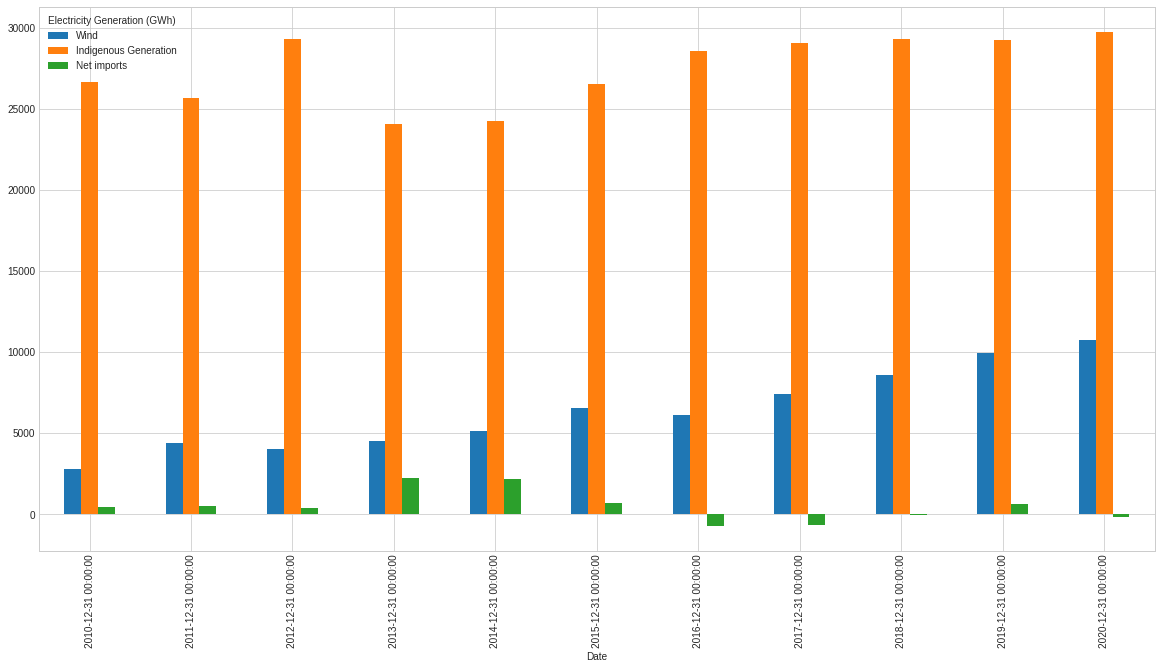

In [41]:
plt.figure(figsize = (10,8))
yeareaggds.plot.bar(figsize=(20, 10))